# Inception V2

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

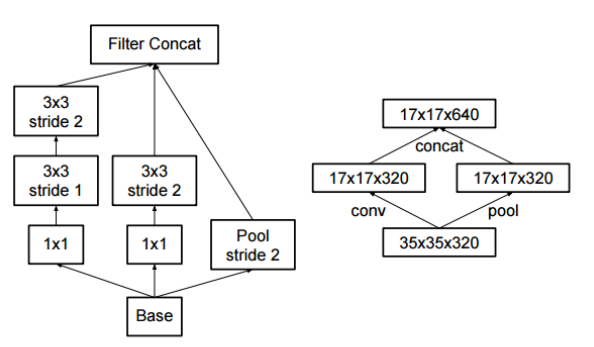

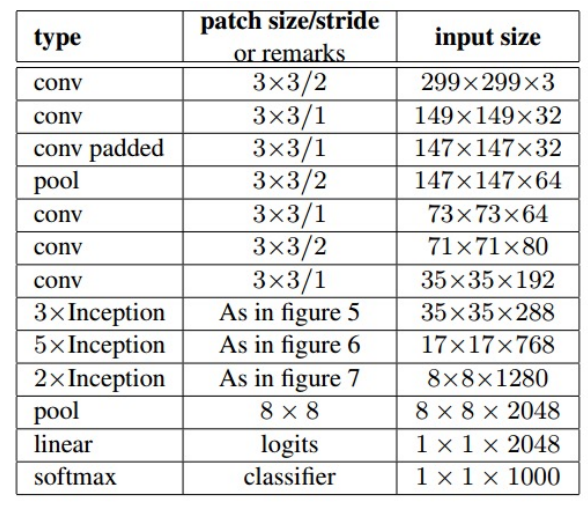

In [2]:
class IncetionModule(nn.Module):
    def __init__(self, in_channels, out_1x1, reduce_3x3, out_3x3, reduce_5x5, out_5x5, out_pool):
        super(IncetionModule, self).__init__()

        # 1x1 conv branch
        self.conv1x1 = nn.Conv2d(in_channels, out_1x1, kernel_size=1)


        # 3x3 conv branch
        self.conv3x3_reduce = nn.Conv2d(in_channels, reduce_3x3, kernel_size=1)     #---> 목적: 입력채널 줄이기 in_channel->reduce3x3
        self.conv3x3 = nn.Conv2d(reduce_3x3, out_3x3, kernel_size=3, padding=1)     #---> 입력 reduce3x3 -> out3x3


        # 5x5 conv branch
        self.conv5x5_reduce = nn.Conv2d(in_channels, reduce_5x5, kernel_size=1)
        self.conv5x5 = nn.Conv2d(reduce_5x5, out_5x5, kernel_size=5, padding=1)

        # max pooling branch
        self.pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.conv_pool = nn.Conv2d(in_channels, out_pool, kernel_size=1)


    def forward(self, x):
        out_1x1 = F.relu(self.conv1x1(x))

        out_3x3 = F.relu(self.conv3x3(F.relu(self.conv3x3_reduce(x))))

        out_5x5 = F.relu(self.conv5x5(F.relu(self.conv5x5_reduce(x))))

        out_pool = F.relu(self.conv_pool(self.pool(x)))

        outputs = [out_1x1, out_3x3, out_5x5, out_pool]
        return torch.cat(outputs, dim=1)

In [3]:
class InceptionV2(nn.Module):
    def __init__(self, num_classes=1000):
        super(InceptionV2, self).__init__()
        
        # Stem layers ---> 모델 초기 단계에 입력 이미지에 대해 초기 특성 추출
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),   #padding=3 :이미지 가장자리 손실 방지
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.inception1(x)
        x = self.inception2(x)
        x = self.inception3(x)
        x = self.inception4(x)
        x = self.inception5(x)
        x = self.inception6(x)
        x = self.inception7(x)
        x = self.inception8(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x



In [4]:

model = InceptionV2(num_classes=1000)
inputs = torch.randn(1, 3, 224, 224)
outputs = model(inputs)
print(outputs)

AttributeError: 'InceptionV2' object has no attribute 'conv1'